# Training AdaMM

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


%load_ext autoreload
%autoreload 2

from run import  main

In [18]:
def multiple_trainings_subplots(title, train_losses, validation_losses, validation_accuracies, epoch_time):

    fig, axs = plt.subplots(1, 3)
    fig.suptitle(title, fontsize=16)
    axs.flat[0].plot(train_losses, label= "Train Loss")
    axs.flat[0].plot(validation_losses, label= "Test Loss")
    axs.flat[0].set_title("Losses")
    axs.flat[0].legend()
    axs.flat[1].plot(validation_accuracies, label= "Accuracy")
    axs.flat[1].set_title("Accuracy")
    axs.flat[1].legend()
    axs.flat[2].hist(epoch_time, label= "Time", bins=30)
    mean = np.asarray(epoch_time).mean()
    axs.flat[2].axvline(mean, color = 'red', lw = 3, label = f"mean: {np.round(mean, 3)}")
    axs.flat[2].set_title("Execution time")
    axs.flat[2].legend()

    #fig.supxlabel("Epochs")
    #fig.supylabel("Metrics")
    fig = plt.gcf()
    fig.set_size_inches(18, 5)

    plt.show()

## EfficientNet B0

In [2]:
config = {
    "seed": 23,
    "batch_size": 128,
    "net": 'b0',
    "optimizer": 'AdaMM',
    "epochs": 10,
    "verbose": True
}
train_losses, validation_losses, validation_accuracies, epoch_time = main(False, config = config)

Device used:  cuda 

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/10 |train loss: 2.0083 |test loss: 1.5757 |acc: 0.4032 |time: 57.0287
Epoch: 2/10 |train loss: 1.4871 |test loss: 1.3563 |acc: 0.5045 |time: 47.5736
Epoch: 3/10 |train loss: 1.2926 |test loss: 1.2455 |acc: 0.5544 |time: 48.0278
Epoch: 4/10 |train loss: 1.1452 |test loss: 1.1276 |acc: 0.6016 |time: 49.0077
Epoch: 5/10 |train loss: 1.0248 |test loss: 1.0729 |acc: 0.6253 |time: 46.6606
Epoch: 6/10 |train loss: 0.9318 |test loss: 1.0171 |acc: 0.6469 |time: 46.8494
Epoch: 7/10 |train loss: 0.8481 |test loss: 1.0269 |acc: 0.6432 |time: 46.6921
Epoch: 8/10 |train loss: 0.7781 |test loss: 0.9828 |acc: 0.6638 |time: 46.5696
Epoch: 9/10 |train loss: 0.7171 |test loss: 0.9714 |acc: 0.6718 |time: 47.1217
Epoch: 10/10 |train loss: 0.6601 |test loss: 0.9783 |acc: 0.6703 |time: 51.1284


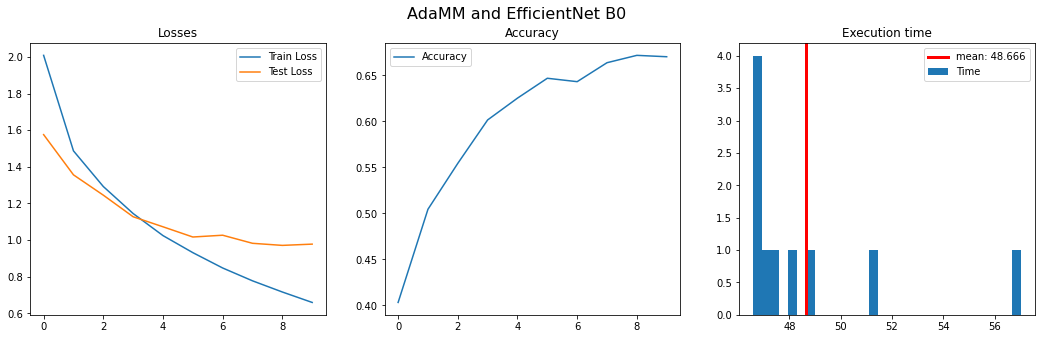

In [19]:
multiple_trainings_subplots("AdaMM and EfficientNet B0",train_losses, validation_losses, validation_accuracies, epoch_time)

In [20]:
config['optimizer']='Our-AdaMM'
train_losses, validation_losses, validation_accuracies, epoch_time = main(False, config = config)

Device used:  cuda 

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/10 |train loss: 1.8977 |test loss: 1.6116 |acc: 0.3817 |time: 46.1248
Epoch: 2/10 |train loss: 1.4668 |test loss: 1.3019 |acc: 0.5131 |time: 47.1679
Epoch: 3/10 |train loss: 1.2399 |test loss: 1.1857 |acc: 0.5881 |time: 47.1713
Epoch: 4/10 |train loss: 1.0804 |test loss: 1.1217 |acc: 0.6035 |time: 47.6832
Epoch: 5/10 |train loss: 0.9770 |test loss: 0.9650 |acc: 0.6541 |time: 47.1145
Epoch: 6/10 |train loss: 0.8707 |test loss: 0.9306 |acc: 0.6758 |time: 48.2590
Epoch: 7/10 |train loss: 0.7923 |test loss: 0.8689 |acc: 0.6992 |time: 48.6455
Epoch: 8/10 |train loss: 0.7341 |test loss: 0.9204 |acc: 0.6857 |time: 45.7356
Epoch: 9/10 |train loss: 0.9234 |test loss: 0.8606 |acc: 0.7034 |time: 45.5924
Epoch: 10/10 |train loss: 0.7132 |test loss: 0.8562 |acc: 0.7048 |time: 45.8311


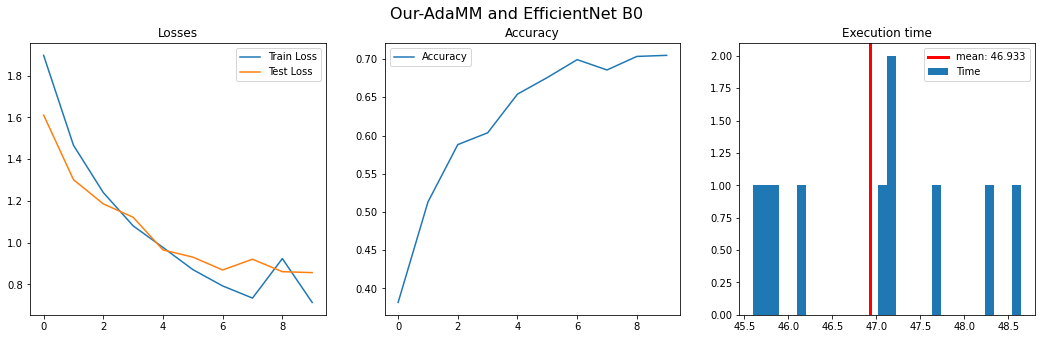

In [21]:
multiple_trainings_subplots("Our-AdaMM and EfficientNet B0",train_losses, validation_losses, validation_accuracies, epoch_time)


In [ ]:
config['optimizer']='ZO-AdaMM'
config['lr'] = 1e-3
config['beta1'] = 0.3
config['beta2'] = 0.9
config['mu'] = 1e-3

train_losses, validation_losses, validation_accuracies, epoch_time = main(False, config = config)

## EfficientNet B1

In [22]:
config['optimizer']='AdaMM'
config['net']='b1'
train_losses, validation_losses, validation_accuracies, epoch_time = main(False, config = config)

Device used:  cuda 

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/10 |train loss: 2.1863 |test loss: 1.7329 |acc: 0.3500 |time: 63.7209
Epoch: 2/10 |train loss: 1.6275 |test loss: 1.5008 |acc: 0.4397 |time: 63.3818
Epoch: 3/10 |train loss: 1.4435 |test loss: 1.3688 |acc: 0.5054 |time: 63.5716
Epoch: 4/10 |train loss: 1.3211 |test loss: 1.2838 |acc: 0.5396 |time: 63.3458
Epoch: 5/10 |train loss: 1.2164 |test loss: 1.2205 |acc: 0.5608 |time: 63.7612
Epoch: 6/10 |train loss: 1.1390 |test loss: 1.1623 |acc: 0.5886 |time: 63.5808
Epoch: 7/10 |train loss: 1.0625 |test loss: 1.1412 |acc: 0.5926 |time: 62.1094
Epoch: 8/10 |train loss: 0.9962 |test loss: 1.1019 |acc: 0.6127 |time: 60.0699
Epoch: 9/10 |train loss: 0.9333 |test loss: 1.1110 |acc: 0.6128 |time: 60.1576
Epoch: 10/10 |train loss: 0.8763 |test loss: 1.1023 |acc: 0.6164 |time: 60.0493


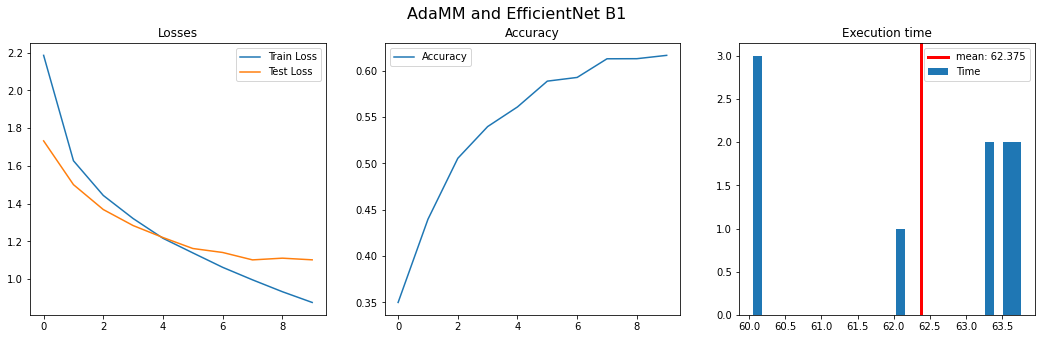

In [23]:
multiple_trainings_subplots("AdaMM and EfficientNet B1",train_losses, validation_losses, validation_accuracies, epoch_time)

In [24]:
config['optimizer']="Our-AdaMM"
train_losses, validation_losses, validation_accuracies, epoch_time = main(False, config = config)

Device used:  cuda 

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/10 |train loss: 2.1860 |test loss: 1.9476 |acc: 0.2505 |time: 58.5561
Epoch: 2/10 |train loss: 1.9095 |test loss: 1.7667 |acc: 0.3133 |time: 59.7414
Epoch: 3/10 |train loss: 1.7179 |test loss: 1.6461 |acc: 0.3952 |time: 60.1853
Epoch: 4/10 |train loss: 1.5781 |test loss: 1.5682 |acc: 0.4213 |time: 61.3239
Epoch: 5/10 |train loss: 1.5158 |test loss: 1.4596 |acc: 0.4796 |time: 59.3234
Epoch: 6/10 |train loss: 1.3963 |test loss: 1.4013 |acc: 0.5059 |time: 60.4850
Epoch: 7/10 |train loss: 1.3223 |test loss: 1.2907 |acc: 0.5397 |time: 60.6564
Epoch: 8/10 |train loss: 1.2602 |test loss: 1.2534 |acc: 0.5502 |time: 60.8584
Epoch: 9/10 |train loss: 1.1738 |test loss: 1.2060 |acc: 0.5702 |time: 60.3567
Epoch: 10/10 |train loss: 1.0978 |test loss: 1.1365 |acc: 0.6037 |time: 59.7007


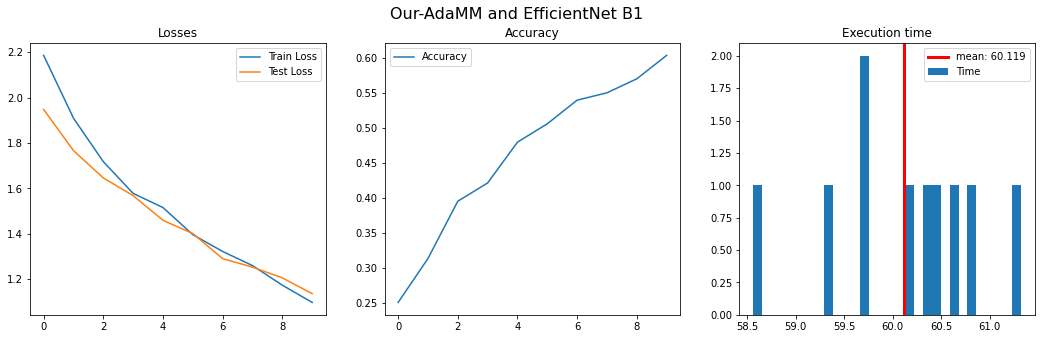

In [25]:
multiple_trainings_subplots("Our-AdaMM and EfficientNet B1",train_losses, validation_losses, validation_accuracies, epoch_time)

## EfficientNet B2

In [26]:
config['optimizer']='AdaMM'
config['net']='b2'
train_losses, validation_losses, validation_accuracies, epoch_time = main(False, config = config)

Device used:  cuda 

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/10 |train loss: 2.2164 |test loss: 1.7562 |acc: 0.3361 |time: 64.3832
Epoch: 2/10 |train loss: 1.6728 |test loss: 1.5753 |acc: 0.4066 |time: 63.4589
Epoch: 3/10 |train loss: 1.4840 |test loss: 1.4094 |acc: 0.4824 |time: 63.6570
Epoch: 4/10 |train loss: 1.3578 |test loss: 1.3342 |acc: 0.5144 |time: 63.8346
Epoch: 5/10 |train loss: 1.2446 |test loss: 1.2780 |acc: 0.5403 |time: 63.6407
Epoch: 6/10 |train loss: 1.1487 |test loss: 1.2120 |acc: 0.5637 |time: 63.6760
Epoch: 7/10 |train loss: 1.0642 |test loss: 1.1573 |acc: 0.5818 |time: 63.6315
Epoch: 8/10 |train loss: 0.9911 |test loss: 1.1386 |acc: 0.6010 |time: 65.2454
Epoch: 9/10 |train loss: 0.9204 |test loss: 1.1211 |acc: 0.6110 |time: 61.6798
Epoch: 10/10 |train loss: 0.8576 |test loss: 1.1153 |acc: 0.6150 |time: 60.8153


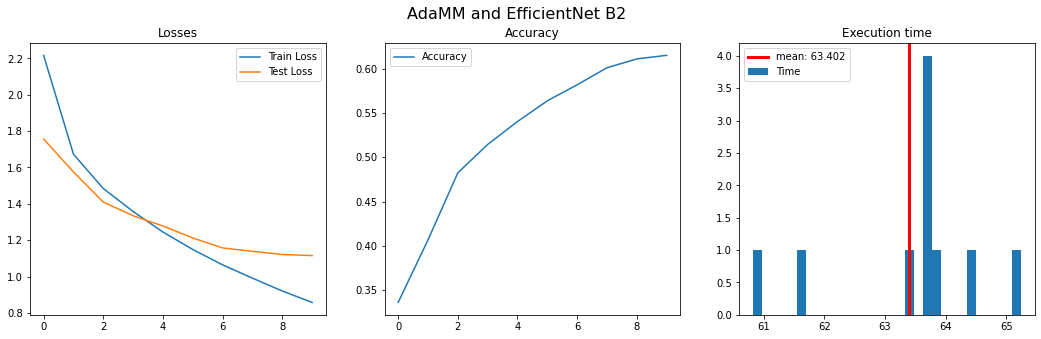

In [27]:
multiple_trainings_subplots("AdaMM and EfficientNet B2",train_losses, validation_losses, validation_accuracies, epoch_time)

In [28]:
config['optimizer']="Our-AdaMM"
train_losses, validation_losses, validation_accuracies, epoch_time = main(False, config = config)

Device used:  cuda 

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/10 |train loss: 2.1827 |test loss: 2.2139 |acc: 0.2532 |time: 61.5889
Epoch: 2/10 |train loss: 1.9602 |test loss: 1.7991 |acc: 0.3166 |time: 62.1541
Epoch: 3/10 |train loss: 1.8453 |test loss: 1.7547 |acc: 0.3403 |time: 60.3410
Epoch: 4/10 |train loss: 1.7825 |test loss: 1.6799 |acc: 0.3802 |time: 59.3552
Epoch: 5/10 |train loss: 1.6127 |test loss: 1.5917 |acc: 0.4373 |time: 59.0607
Epoch: 6/10 |train loss: 1.6111 |test loss: 1.4715 |acc: 0.4518 |time: 59.3033
Epoch: 7/10 |train loss: 1.5024 |test loss: 1.4345 |acc: 0.4795 |time: 58.9388
Epoch: 8/10 |train loss: 1.5244 |test loss: 1.3861 |acc: 0.4881 |time: 59.2747
Epoch: 9/10 |train loss: 1.3612 |test loss: 1.2893 |acc: 0.5349 |time: 60.0197
Epoch: 10/10 |train loss: 1.3328 |test loss: 1.3103 |acc: 0.5250 |time: 60.3515


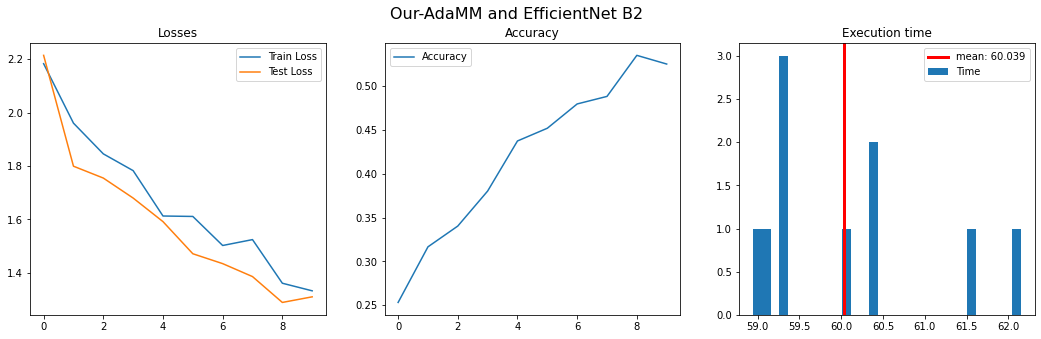

In [29]:
multiple_trainings_subplots("Our-AdaMM and EfficientNet B2",train_losses, validation_losses, validation_accuracies, epoch_time)

## EfficientNet B3

In [30]:
config['optimizer']='AdaMM'
config['net']='b3'
train_losses, validation_losses, validation_accuracies, epoch_time = main(False, config = config)

Device used:  cuda 

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/10 |train loss: 2.2710 |test loss: 1.8413 |acc: 0.2858 |time: 73.1942
Epoch: 2/10 |train loss: 1.7779 |test loss: 1.6381 |acc: 0.3707 |time: 68.9427
Epoch: 3/10 |train loss: 1.5735 |test loss: 1.4618 |acc: 0.4598 |time: 69.5340
Epoch: 4/10 |train loss: 1.4099 |test loss: 1.3603 |acc: 0.5031 |time: 69.5078
Epoch: 5/10 |train loss: 1.2850 |test loss: 1.2873 |acc: 0.5273 |time: 69.0122
Epoch: 6/10 |train loss: 1.1805 |test loss: 1.2267 |acc: 0.5617 |time: 68.8223
Epoch: 7/10 |train loss: 1.0861 |test loss: 1.1773 |acc: 0.5842 |time: 70.0635
Epoch: 8/10 |train loss: 1.0082 |test loss: 1.1563 |acc: 0.5842 |time: 70.0351
Epoch: 9/10 |train loss: 0.9463 |test loss: 1.1529 |acc: 0.5890 |time: 72.0476
Epoch: 10/10 |train loss: 0.8650 |test loss: 1.1308 |acc: 0.6082 |time: 70.0968


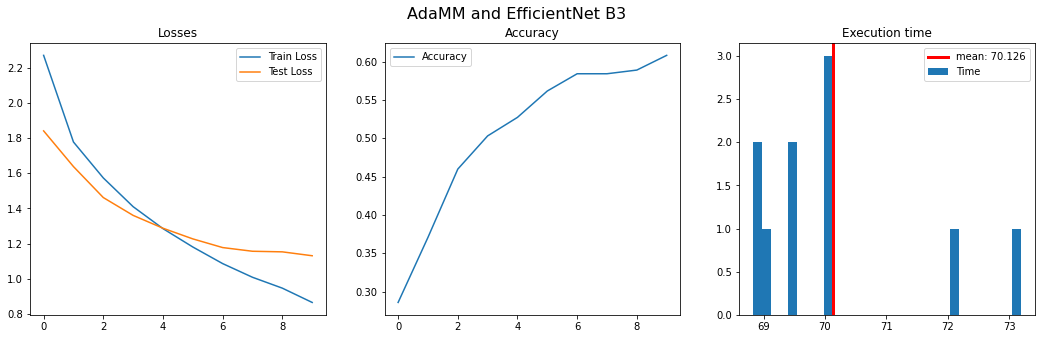

In [31]:
multiple_trainings_subplots("AdaMM and EfficientNet B3",train_losses, validation_losses, validation_accuracies, epoch_time)

In [32]:
config['optimizer']="Our-AdaMM"
train_losses, validation_losses, validation_accuracies, epoch_time = main(False, config = config)

Device used:  cuda 

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/10 |train loss: 2.3059 |test loss: 3.0634 |acc: 0.2361 |time: 67.9632
Epoch: 2/10 |train loss: 1.9224 |test loss: 1.7828 |acc: 0.3290 |time: 70.3283
Epoch: 3/10 |train loss: 1.7606 |test loss: 1.6526 |acc: 0.4064 |time: 69.3405
Epoch: 4/10 |train loss: 1.5896 |test loss: 1.4749 |acc: 0.4718 |time: 67.7595
Epoch: 5/10 |train loss: 1.4737 |test loss: 1.3930 |acc: 0.4959 |time: 66.7809
Epoch: 6/10 |train loss: 1.3740 |test loss: 1.4029 |acc: 0.5347 |time: 69.9853
Epoch: 7/10 |train loss: 1.2913 |test loss: 1.2404 |acc: 0.5737 |time: 73.3173
Epoch: 8/10 |train loss: 1.2650 |test loss: 1.4994 |acc: 0.5589 |time: 70.6758
Epoch: 9/10 |train loss: 1.1732 |test loss: 1.6132 |acc: 0.6089 |time: 72.8124
Epoch: 10/10 |train loss: 1.0732 |test loss: 1.1826 |acc: 0.6214 |time: 70.4597


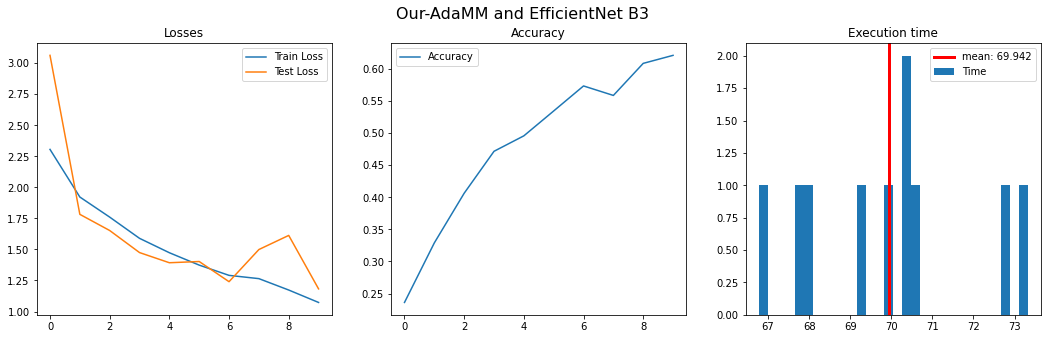

In [33]:
multiple_trainings_subplots("Our-AdaMM and EfficientNet B3",train_losses, validation_losses, validation_accuracies, epoch_time)

## EfficientNet B4

In [34]:
config['optimizer']='AdaMM'
config['net']='b4'
train_losses, validation_losses, validation_accuracies, epoch_time = main(False, config = config)

Device used:  cuda 

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/10 |train loss: 2.2912 |test loss: 1.9220 |acc: 0.2514 |time: 89.8946
Epoch: 2/10 |train loss: 1.8108 |test loss: 1.6654 |acc: 0.3579 |time: 88.5080
Epoch: 3/10 |train loss: 1.6079 |test loss: 1.5007 |acc: 0.4363 |time: 88.5053
Epoch: 4/10 |train loss: 1.4566 |test loss: 1.4123 |acc: 0.4850 |time: 88.9138
Epoch: 5/10 |train loss: 1.3493 |test loss: 1.3384 |acc: 0.5067 |time: 88.3746
Epoch: 6/10 |train loss: 1.2866 |test loss: 1.2929 |acc: 0.5305 |time: 90.2284
Epoch: 7/10 |train loss: 1.1849 |test loss: 1.2701 |acc: 0.5441 |time: 91.6523
Epoch: 8/10 |train loss: 1.1064 |test loss: 1.2111 |acc: 0.5651 |time: 90.3931
Epoch: 9/10 |train loss: 1.0864 |test loss: 1.2046 |acc: 0.5693 |time: 83.7812
Epoch: 10/10 |train loss: 1.0265 |test loss: 1.1500 |acc: 0.5882 |time: 84.0167


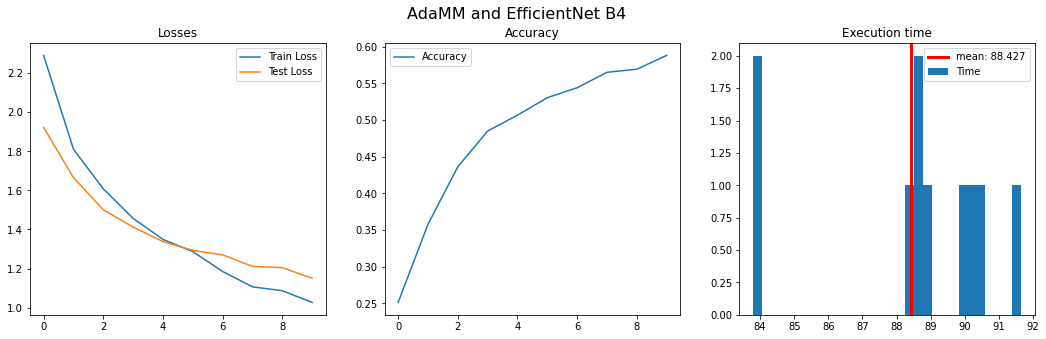

In [35]:
multiple_trainings_subplots("AdaMM and EfficientNet B4",train_losses, validation_losses, validation_accuracies, epoch_time)

In [36]:
config['optimizer']="Our-AdaMM"
train_losses, validation_losses, validation_accuracies, epoch_time = main(False, config = config)

Device used:  cuda 

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/10 |train loss: 2.5101 |test loss: 2.6866 |acc: 0.1088 |time: 81.0290
Epoch: 2/10 |train loss: 2.4517 |test loss: 3.0105 |acc: 0.1327 |time: 81.1756
Epoch: 3/10 |train loss: 2.2991 |test loss: 2.1889 |acc: 0.1728 |time: 81.2385
Epoch: 4/10 |train loss: 2.3534 |test loss: 2.2146 |acc: 0.1622 |time: 81.1026
Epoch: 5/10 |train loss: 2.3586 |test loss: 2.5032 |acc: 0.1126 |time: 81.2242
Epoch: 6/10 |train loss: 2.3401 |test loss: 2.1342 |acc: 0.1960 |time: 81.0829
Epoch: 7/10 |train loss: 2.1919 |test loss: 2.0909 |acc: 0.2184 |time: 81.1841
Epoch: 8/10 |train loss: 2.1544 |test loss: 2.0936 |acc: 0.2348 |time: 81.3988
Epoch: 9/10 |train loss: 2.1154 |test loss: 2.2257 |acc: 0.1411 |time: 81.1645
Epoch: 10/10 |train loss: 2.2819 |test loss: 2.0637 |acc: 0.1975 |time: 80.9898


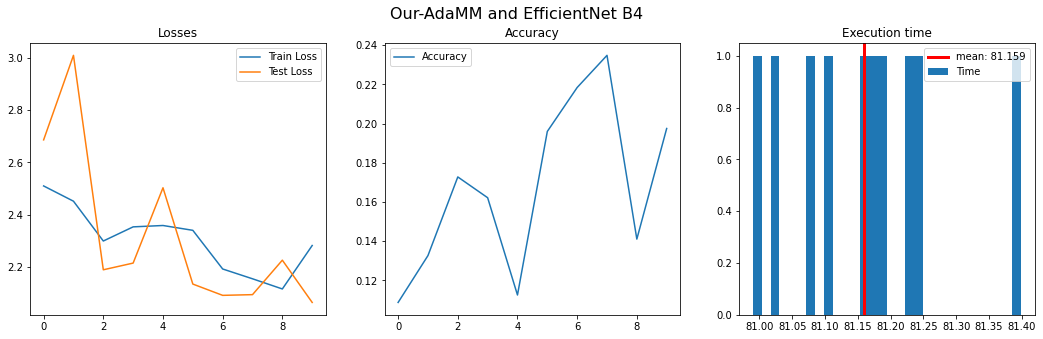

In [37]:
multiple_trainings_subplots("Our-AdaMM and EfficientNet B4",train_losses, validation_losses, validation_accuracies, epoch_time)

## EfficientNet B5

In [38]:
config['optimizer']='AdaMM'
config['net']='b5'
train_losses, validation_losses, validation_accuracies, epoch_time = main(False, config = config)

Device used:  cuda 

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/10 |train loss: 2.4199 |test loss: 2.9133 |acc: 0.1000 |time: 99.4287
Epoch: 2/10 |train loss: 2.0275 |test loss: 2.1344 |acc: 0.2092 |time: 99.8100
Epoch: 3/10 |train loss: 1.9400 |test loss: 1.7949 |acc: 0.2732 |time: 99.9053
Epoch: 4/10 |train loss: 1.8165 |test loss: 1.7404 |acc: 0.3031 |time: 99.5606
Epoch: 5/10 |train loss: 1.7031 |test loss: 1.7451 |acc: 0.3688 |time: 99.5814
Epoch: 6/10 |train loss: 1.5889 |test loss: 1.6002 |acc: 0.3640 |time: 99.8388
Epoch: 7/10 |train loss: 1.4690 |test loss: 1.4337 |acc: 0.4490 |time: 99.4283
Epoch: 8/10 |train loss: 1.3581 |test loss: 1.3324 |acc: 0.5074 |time: 99.4439
Epoch: 9/10 |train loss: 1.2635 |test loss: 1.2523 |acc: 0.5462 |time: 99.6499
Epoch: 10/10 |train loss: 1.1650 |test loss: 1.1724 |acc: 0.5882 |time: 99.7088


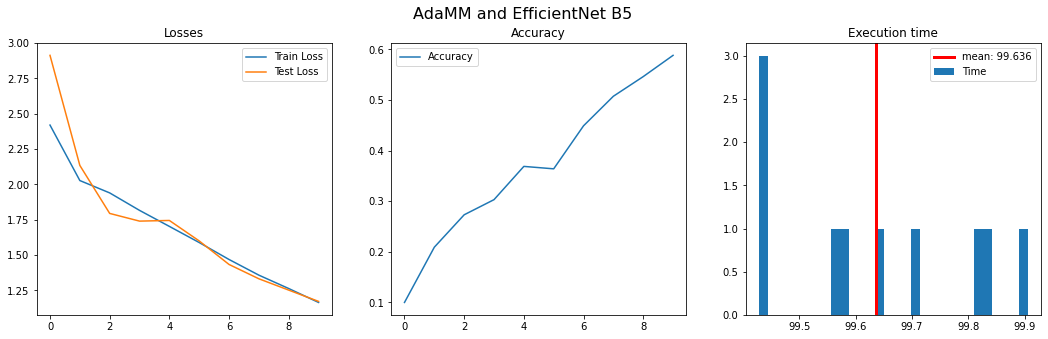

In [39]:
multiple_trainings_subplots("AdaMM and EfficientNet B5",train_losses, validation_losses, validation_accuracies, epoch_time)

In [40]:
config['optimizer']="Our-AdaMM"
train_losses, validation_losses, validation_accuracies, epoch_time = main(False, config = config)

Device used:  cuda 

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/10 |train loss: 2.6195 |test loss: 2.3099 |acc: 0.1000 |time: 96.4129
Epoch: 2/10 |train loss: 2.4129 |test loss: 2.3224 |acc: 0.0939 |time: 96.7080
Epoch: 3/10 |train loss: 2.1614 |test loss: 2.1548 |acc: 0.1738 |time: 96.3836
Epoch: 4/10 |train loss: 2.0772 |test loss: 1.9807 |acc: 0.2197 |time: 97.2474
Epoch: 5/10 |train loss: 2.1283 |test loss: 4.4735 |acc: 0.1368 |time: 96.2987
Epoch: 6/10 |train loss: 2.1437 |test loss: 2.0512 |acc: 0.1918 |time: 96.5585
Epoch: 7/10 |train loss: 2.0628 |test loss: 1.9632 |acc: 0.2395 |time: 96.5467
Epoch: 8/10 |train loss: 1.9672 |test loss: 1.9229 |acc: 0.2528 |time: 96.3703
Epoch: 9/10 |train loss: 1.9343 |test loss: 1.9366 |acc: 0.2702 |time: 96.3903
Epoch: 10/10 |train loss: 1.9758 |test loss: 2.2683 |acc: 0.1401 |time: 96.6098


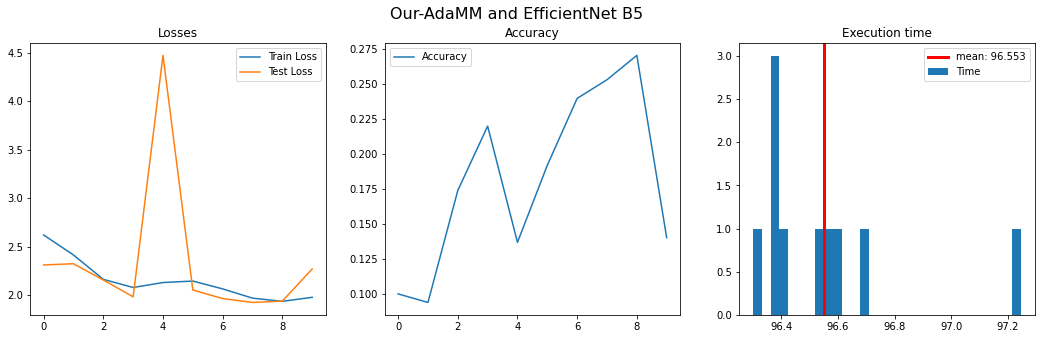

In [41]:
multiple_trainings_subplots("Our-AdaMM and EfficientNet B5",train_losses, validation_losses, validation_accuracies, epoch_time)

## EfficientNet B6

In [42]:
config['optimizer']='AdaMM'
config['net']='b6'
train_losses, validation_losses, validation_accuracies, epoch_time = main(False, config = config)

Device used:  cuda 

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/10 |train loss: 2.5382 |test loss: 2.5973 |acc: 0.1000 |time: 112.6775
Epoch: 2/10 |train loss: 2.0791 |test loss: 2.0903 |acc: 0.2093 |time: 112.9005
Epoch: 3/10 |train loss: 1.9569 |test loss: 1.8866 |acc: 0.2569 |time: 112.9880
Epoch: 4/10 |train loss: 1.9165 |test loss: 1.9371 |acc: 0.2429 |time: 113.1230
Epoch: 5/10 |train loss: 1.8551 |test loss: 2.1084 |acc: 0.2886 |time: 113.0247
Epoch: 6/10 |train loss: 1.7288 |test loss: 1.6751 |acc: 0.3632 |time: 112.9683
Epoch: 7/10 |train loss: 1.6356 |test loss: 1.6676 |acc: 0.4014 |time: 113.1081
Epoch: 8/10 |train loss: 1.5404 |test loss: 1.5352 |acc: 0.4187 |time: 113.3392
Epoch: 9/10 |train loss: 1.4722 |test loss: 1.5422 |acc: 0.4320 |time: 113.1853
Epoch: 10/10 |train loss: 1.3817 |test loss: 1.3582 |acc: 0.4938 |time: 113.4247


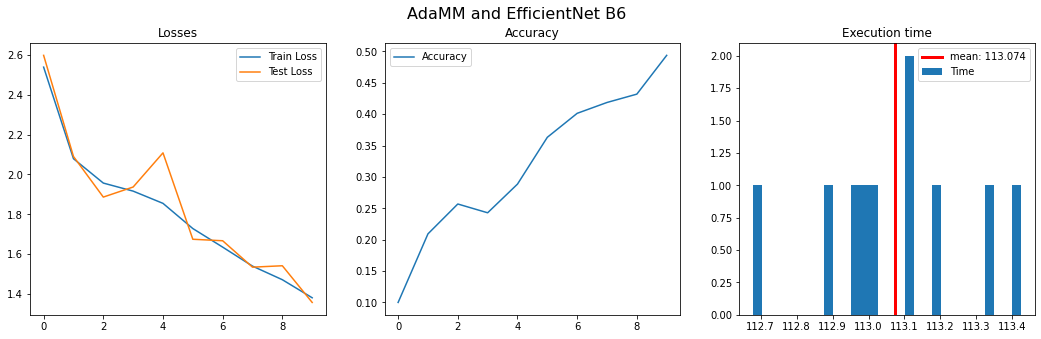

In [43]:
multiple_trainings_subplots("AdaMM and EfficientNet B6",train_losses, validation_losses, validation_accuracies, epoch_time)

In [44]:
config['optimizer']="Our-AdaMM"
train_losses, validation_losses, validation_accuracies, epoch_time = main(False, config = config)

Device used:  cuda 

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/10 |train loss: 2.7910 |test loss: 2.3187 |acc: 0.1000 |time: 109.9129
Epoch: 2/10 |train loss: 2.5546 |test loss: 2.3115 |acc: 0.1009 |time: 109.9849
Epoch: 3/10 |train loss: 2.5021 |test loss: 2.4102 |acc: 0.1089 |time: 110.0605
Epoch: 4/10 |train loss: 2.4915 |test loss: 2.3563 |acc: 0.1132 |time: 110.4533
Epoch: 5/10 |train loss: 2.4985 |test loss: 2.2964 |acc: 0.1390 |time: 110.3723
Epoch: 6/10 |train loss: 2.4714 |test loss: 2.2653 |acc: 0.1280 |time: 110.3344
Epoch: 7/10 |train loss: 2.4526 |test loss: 2.2739 |acc: 0.1112 |time: 110.1413
Epoch: 8/10 |train loss: 2.4484 |test loss: 2.2700 |acc: 0.1183 |time: 110.3562
Epoch: 9/10 |train loss: 2.4448 |test loss: 2.2540 |acc: 0.1475 |time: 110.3986
Epoch: 10/10 |train loss: 2.4078 |test loss: 2.2916 |acc: 0.1310 |time: 110.3854


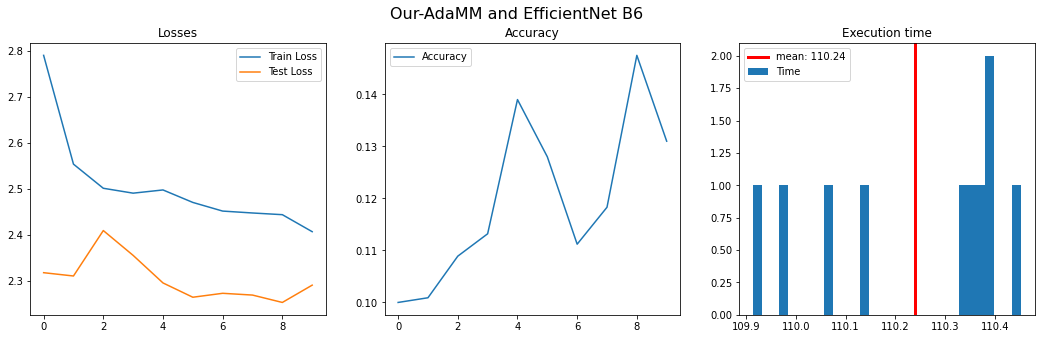

In [45]:
multiple_trainings_subplots("Our-AdaMM and EfficientNet B6",train_losses, validation_losses, validation_accuracies, epoch_time)

## EfficientNet B7

In [46]:
config['optimizer']='AdaMM'
config['net']='b7'
train_losses, validation_losses, validation_accuracies, epoch_time = main(False, config = config)

Device used:  cuda 

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/10 |train loss: 2.5901 |test loss: 2.7321 |acc: 0.1000 |time: 138.1472
Epoch: 2/10 |train loss: 2.0888 |test loss: 2.1413 |acc: 0.1750 |time: 138.0322
Epoch: 3/10 |train loss: 2.0583 |test loss: 15.1358 |acc: 0.1714 |time: 137.7312
Epoch: 4/10 |train loss: 2.0120 |test loss: 1.9288 |acc: 0.2664 |time: 137.9452
Epoch: 5/10 |train loss: 2.1980 |test loss: 22.8925 |acc: 0.1985 |time: 138.2077
Epoch: 6/10 |train loss: 2.0256 |test loss: 2.2717 |acc: 0.2723 |time: 139.3149
Epoch: 7/10 |train loss: 1.8266 |test loss: 1.7559 |acc: 0.3241 |time: 140.5915
Epoch: 8/10 |train loss: 1.7346 |test loss: 1.6312 |acc: 0.3777 |time: 139.3740
Epoch: 9/10 |train loss: 1.6517 |test loss: 1.6093 |acc: 0.3946 |time: 138.3624
Epoch: 10/10 |train loss: 1.5924 |test loss: 1.5173 |acc: 0.4408 |time: 138.7433


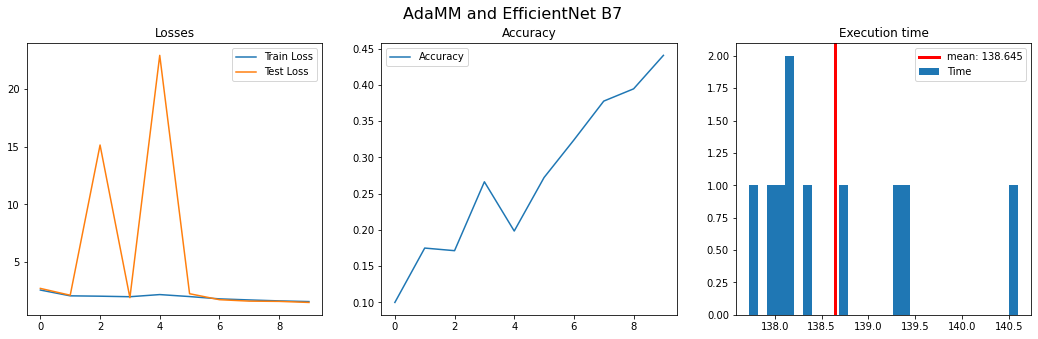

In [47]:
multiple_trainings_subplots("AdaMM and EfficientNet B7",train_losses, validation_losses, validation_accuracies, epoch_time)

In [48]:
config['optimizer']="Our-AdaMM"
train_losses, validation_losses, validation_accuracies, epoch_time = main(False, config = config)

Device used:  cuda 

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/10 |train loss: 2.7737 |test loss: 2.3148 |acc: 0.1000 |time: 136.4117
Epoch: 2/10 |train loss: 2.5259 |test loss: 4.3910 |acc: 0.1008 |time: 136.0936
Epoch: 3/10 |train loss: 2.5101 |test loss: 10.7736 |acc: 0.1213 |time: 135.3146
Epoch: 4/10 |train loss: 2.5111 |test loss: 4.9952 |acc: 0.1030 |time: 135.3983
Epoch: 5/10 |train loss: 2.5096 |test loss: 2.3061 |acc: 0.1001 |time: 135.5602
Epoch: 6/10 |train loss: 2.5214 |test loss: 2.4584 |acc: 0.1003 |time: 135.1734
Epoch: 7/10 |train loss: 2.4774 |test loss: 2.1697 |acc: 0.1590 |time: 135.5990
Epoch: 8/10 |train loss: 2.2331 |test loss: 2.4611 |acc: 0.2121 |time: 135.4358
Epoch: 9/10 |train loss: 2.1240 |test loss: 2.2092 |acc: 0.1569 |time: 135.9561
Epoch: 10/10 |train loss: 2.1915 |test loss: 2.4770 |acc: 0.2223 |time: 135.6109


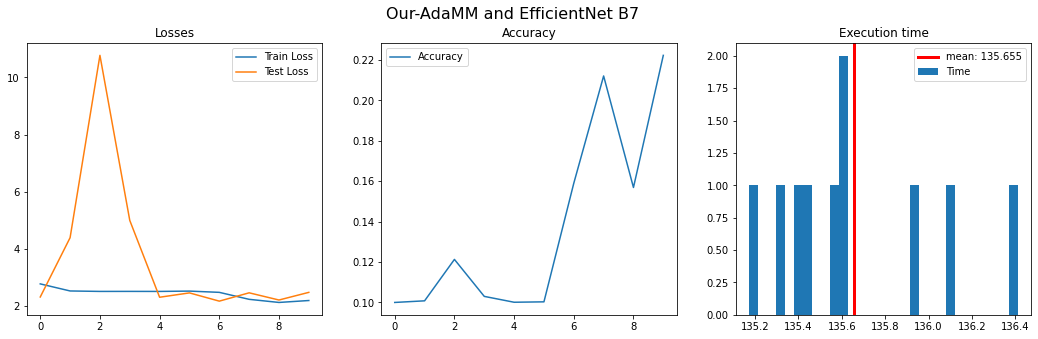

In [49]:
multiple_trainings_subplots("Our-AdaMM and EfficientNet B7",train_losses, validation_losses, validation_accuracies, epoch_time)